<a href="https://colab.research.google.com/github/akashdasp/Application/blob/main/dogs_vs_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 257MB/s]
100% 1.06G/1.06G [00:07<00:00, 149MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


validation_ds=tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#noramlizing the Data

def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
#  Create CNN model


model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4454 - accuracy: 0.7947 - val_loss: 0.5082 - val_accuracy: 0.7276
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.3508 - accuracy: 0.8440 - val_loss: 0.4386 - val_accuracy: 0.8016
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.2654 - accuracy: 0.8889 - val_loss: 0.6006 - val_accuracy: 0.7482
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.1903 - accuracy: 0.9238 - val_loss: 0.6168 - val_accuracy: 0.7218
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.1336 - accuracy: 0.9527 - val_loss: 0.6514 - val_accuracy: 0.7626
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.0983 - accuracy: 0.9650 - val_loss: 0.7323 - val_accuracy: 0.7986
Epoch 7/10
625/625 [==============================] - 68s 109ms/step - loss: 0.0750 - accuracy: 0.9761 - val_loss: 0.8788 - val_ac

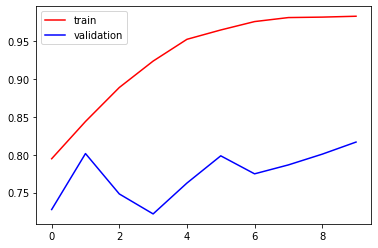

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"],color='red',label='train')
plt.plot(history.history["val_accuracy"],color='blue',label='validation')
plt.legend() 
plt.show()

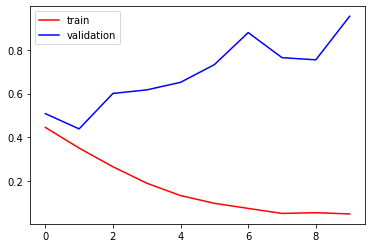

In [ ]:
plt.plot(history.history["loss"],color='red',label='train')
plt.plot(history.history["val_loss"],color='blue',label='validation')
plt.legend() 
plt.show()

### Giving the new data to the to the Model

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread("/content/labrador-retriever-1210559__480.jpg")

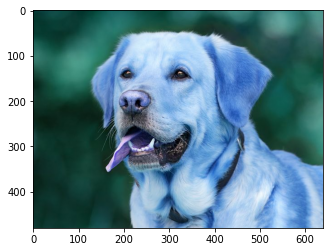

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(480, 640, 3)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 294ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img=cv2.imread("/content/why-cats-are-best-pets-1559241235.jpg")

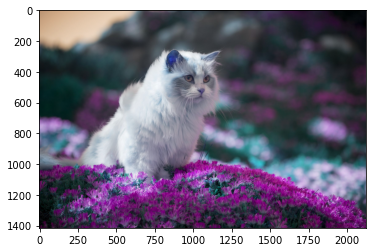

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

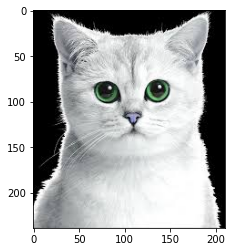

In [ ]:
test_img=cv2.imread("/content/images.jpg")
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 34ms/step


array([[0.]], dtype=float32)

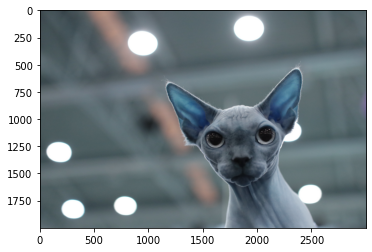

In [ ]:
test_img=cv2.imread("/content/WALN4MAIT4I6VLRIPUMJQAJIME.jpg")
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 75ms/step


array([[1.]], dtype=float32)

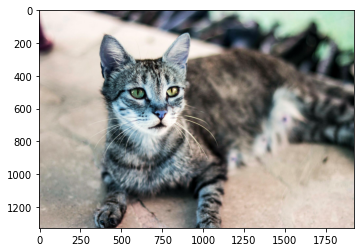

In [ ]:
test_img=cv2.imread("/content/VIER PFOTEN_2016-07-08_011-4993x3455-1920x1329.jpg")
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 16ms/step


array([[1.]], dtype=float32)

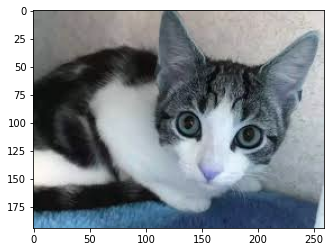

In [ ]:
test_img=cv2.imread("/content/images.jpg")
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 16ms/step


array([[0.]], dtype=float32)

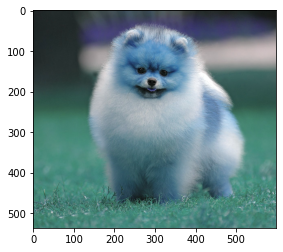

In [ ]:
test_img=cv2.imread("/content/buying-a-dog.jpg")
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

## so the the model is able to detect the Simple picture of cats and Dogs but could not able to detect the complicated Picture 